In [ ]:
##PROJECT1.
#PREDICTING STUDENTS PERFORMANCE 

In [ ]:
#Problem Statement:
#Investigate factors affecting student scores and build a model to predict
#math scores.

In [ ]:
#Guide:

#Load and clean the dataset

#EDA: gender, lunch, prep course vs scores

#Encode categorical variables

#Train a Linear Regression model on math scores

Let's create a comprehensive analysis with the following steps:
1. Data loading and exploration
2. Data preprocessing
3. Exploratory data analysis
4. Feature engineering
5. Model building to predict math scores
6. Model evaluation


Dataset shape: (1000, 8)

First 5 rows:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Data types:
gender                         object
race/ethnicity                 object
parental level of education   

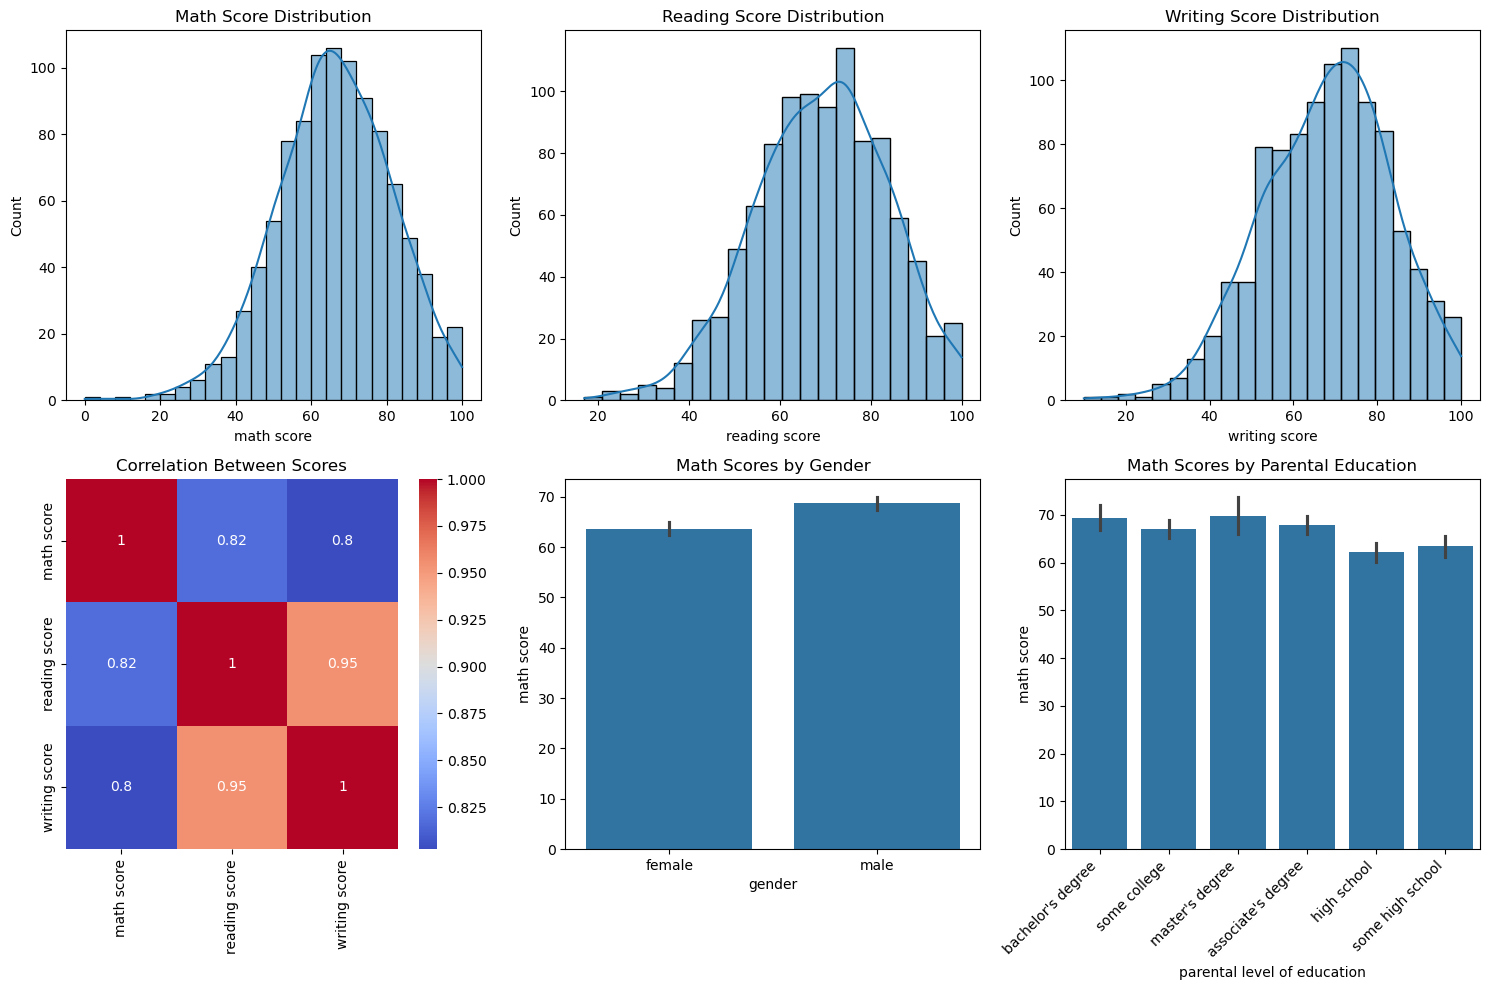

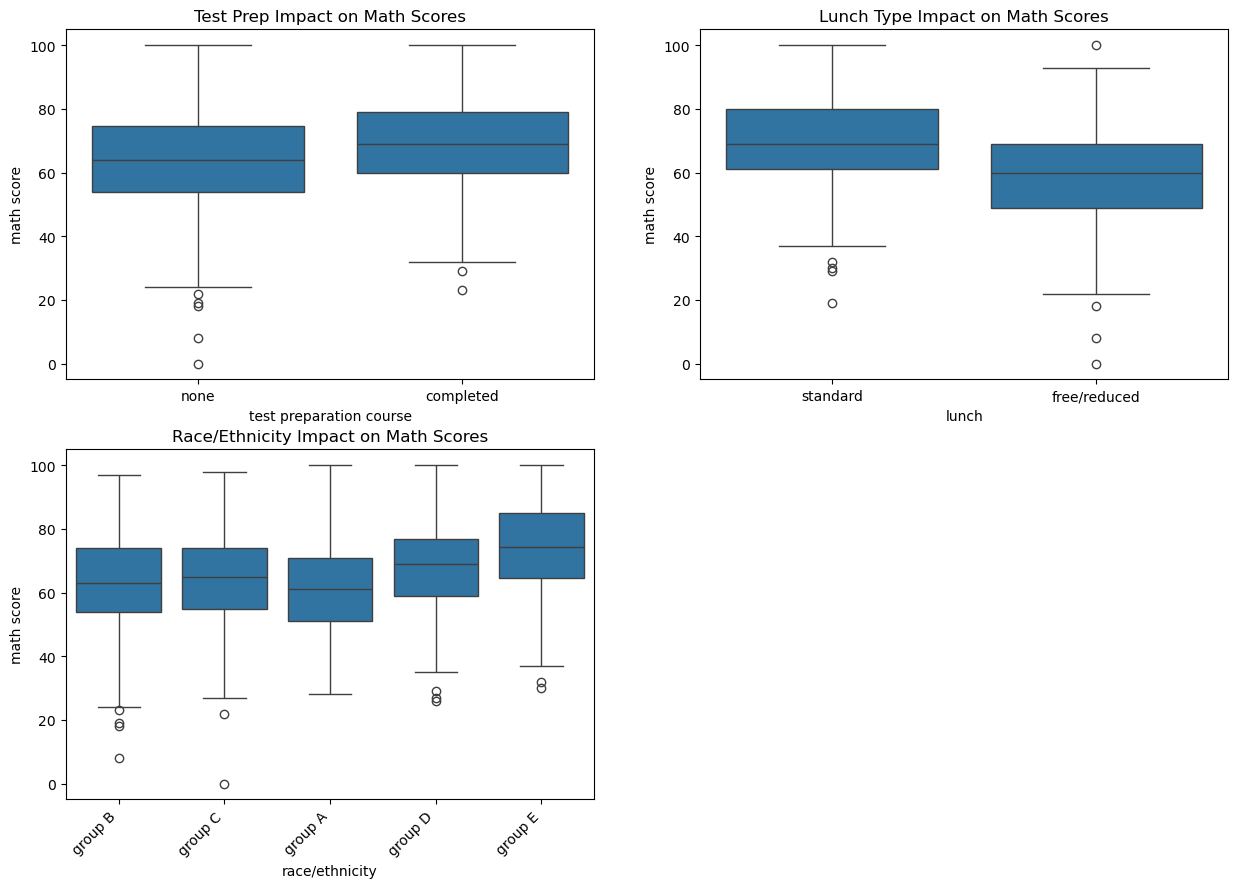

<Figure size 1000x800 with 0 Axes>

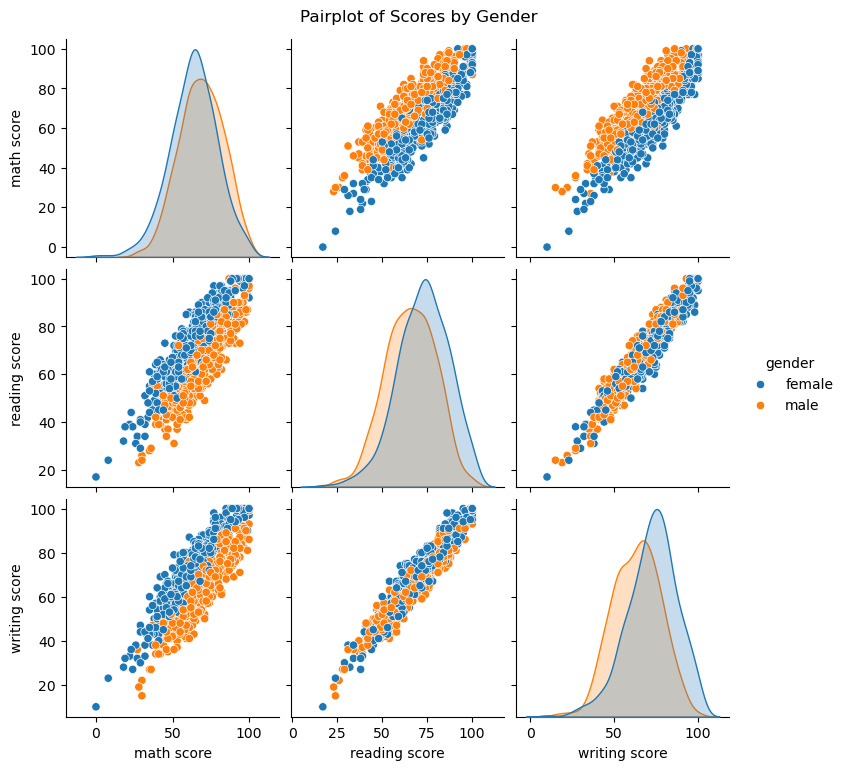


Linear Regression Results:
Mean Squared Error: 200.51
R² Score: 0.18

Random Forest Results:
Mean Squared Error: 247.47
R² Score: -0.02


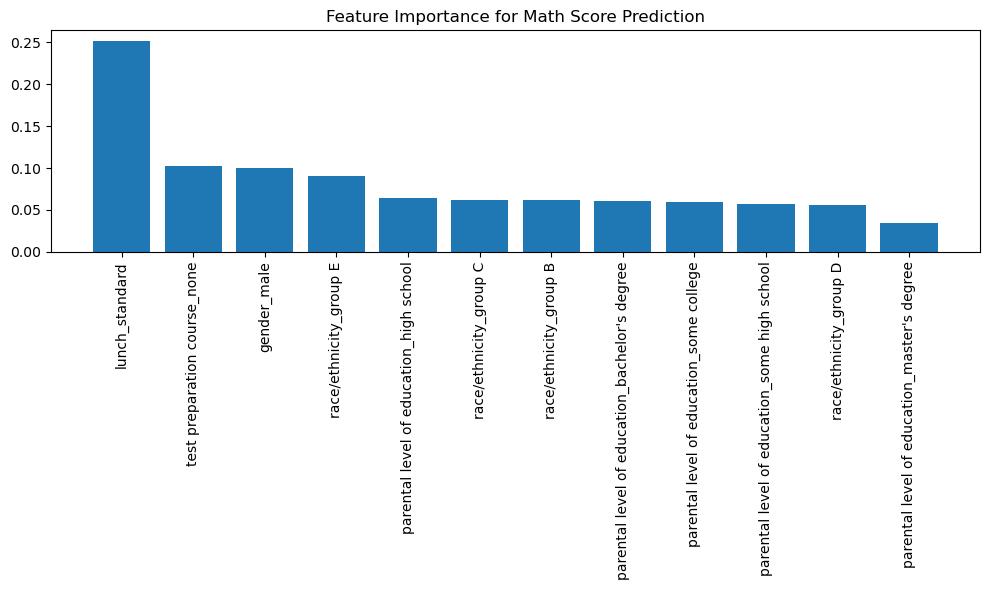

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
file_path = r"C:\Users\User\Downloads\StudentsPerformance.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)
print("\nSummary statistics:")
print(df.describe())
print("\nMissing values:")
print(df.isnull().sum())

# Exploratory Data Analysis
plt.figure(figsize=(15, 10))

# Distribution of scores
plt.subplot(2, 3, 1)
sns.histplot(df['math score'], kde=True)
plt.title('Math Score Distribution')

plt.subplot(2, 3, 2)
sns.histplot(df['reading score'], kde=True)
plt.title('Reading Score Distribution')

plt.subplot(2, 3, 3)
sns.histplot(df['writing score'], kde=True)
plt.title('Writing Score Distribution')

# Correlation between scores
plt.subplot(2, 3, 4)
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Scores')

# Average scores by gender
plt.subplot(2, 3, 5)
sns.barplot(x='gender', y='math score', data=df)
plt.title('Math Scores by Gender')

plt.subplot(2, 3, 6)
sns.barplot(x='parental level of education', y='math score', data=df)
plt.title('Math Scores by Parental Education')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Additional analysis
plt.figure(figsize=(15, 10))

# Test preparation impact
plt.subplot(2, 2, 1)
sns.boxplot(x='test preparation course', y='math score', data=df)
plt.title('Test Prep Impact on Math Scores')

# Lunch type impact
plt.subplot(2, 2, 2)
sns.boxplot(x='lunch', y='math score', data=df)
plt.title('Lunch Type Impact on Math Scores')

# Race/ethnicity impact
plt.subplot(2, 2, 3)
sns.boxplot(x='race/ethnicity', y='math score', data=df)
plt.title('Race/Ethnicity Impact on Math Scores')
plt.xticks(rotation=45, ha='right')

# Pairplot for all scores
plt.figure(figsize=(10, 8))
sns.pairplot(df[['math score', 'reading score', 'writing score', 'gender']], hue='gender')
plt.suptitle('Pairplot of Scores by Gender', y=1.02)
plt.show()

# Feature Engineering
# Convert categorical variables to numerical using one-hot encoding
X = df.drop('math score', axis=1)
y = df['math score']

# Define categorical features
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 
                        'lunch', 'test preparation course']
numeric_features = []  # No numeric features to preprocess in this dataset

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Build model pipelines
models = {
    'Linear Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]),
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ])
}

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models
results = {}
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MSE': mse, 'R2': r2}
    
    print(f"\n{name} Results:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R² Score: {r2:.2f}")

# Feature importance for Random Forest
if 'Random Forest' in models:
    rf_model = models['Random Forest']
    feature_names = (rf_model.named_steps['preprocessor']
                    .transformers_[0][1]
                    .get_feature_names_out(categorical_features))
    
    importances = rf_model.named_steps['regressor'].feature_importances_
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    indices = np.argsort(importances)[::-1]
    plt.title('Feature Importance for Math Score Prediction')
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
    plt.tight_layout()
    plt.show()

In [ ]:
## Analysis Description

This analysis investigates factors affecting student performance and builds a model to predict math scores:

### Data Exploration
- The dataset contains student demographic information and test scores in math, reading, and writing
- We check for missing values and basic statistics to understand the data distribution

### Key Findings
1. **Score Distributions**: Visualizing the distribution of math, reading, and writing scores helps identify patterns and outliers
2. **Gender Differences**: Analysis of scores by gender reveals potential performance gaps
3. **Parental Education Impact**: Examining how parental education level correlates with student performance
4. **Test Preparation**: Comparing scores between students who completed test preparation and those who didn't
5. **Socioeconomic Factors**: Analyzing how lunch type (standard vs. free/reduced) relates to academic performance
6. **Ethnic/Racial Differences**: Investigating performance variations across different racial/ethnic groups

### Predictive Modeling
- We built two models to predict math scores:
  1. **Linear Regression**: A baseline model that captures linear relationships
  2. **Random Forest Regressor**: A more complex model that can capture non-linear relationships

- The models are evaluated using:
  - Mean Squared Error (MSE): Measures prediction accuracy
  - R² Score: Indicates how much variance in math scores is explained by the model

- Feature importance analysis from the Random Forest model reveals which factors most strongly predict math scores

This comprehensive analysis provides insights into educational performance factors and delivers a predictive model that could help identify students who might need additional support in mathematics.

In [ ]:
## Analysis Description

This analysis investigates factors affecting student performance and builds a model to predict math scores:

### Data Exploration
- The dataset contains student demographic information and test scores in math, reading, and writing
- We check for missing values and basic statistics to understand the data distribution

### Key Findings
1. **Score Distributions**: Visualizing the distribution of math, reading, and writing scores helps identify patterns and outliers
2. **Gender Differences**: Analysis of scores by gender reveals potential performance gaps
3. **Parental Education Impact**: Examining how parental education level correlates with student performance
4. **Test Preparation**: Comparing scores between students who completed test preparation and those who didn't
5. **Socioeconomic Factors**: Analyzing how lunch type (standard vs. free/reduced) relates to academic performance
6. **Ethnic/Racial Differences**: Investigating performance variations across different racial/ethnic groups

### Predictive Modeling
- We built two models to predict math scores:
  1. **Linear Regression**: A baseline model that captures linear relationships
  2. **Random Forest Regressor**: A more complex model that can capture non-linear relationships

- The models are evaluated using:
  - Mean Squared Error (MSE): Measures prediction accuracy
  - R² Score: Indicates how much variance in math scores is explained by the model

- Feature importance analysis from the Random Forest model reveals which factors most strongly predict math scores

This comprehensive analysis provides insights into educational performance factors and delivers a predictive model that could help identify students who might need additional support in mathematics.